This notebook have to be renned after 

#SETUP

In [1]:
import pandas as pd
import os
import numpy as np
import pickle
import shutil

from ivpy import attach,show,montage,histogram,scatter,compose
from ivpy.extract import extract
from ivpy.reduce import pca,tsne,umap
from ivpy.cluster import cluster
from ivpy.extract import norm
from sklearn.metrics import adjusted_rand_score as adjrand
from annoy import AnnoyIndex
from ivpy.data import _typecheck,_pathfilter,_featfilter,seq_types
from ivpy.plot import show
from PIL import Image

2021-12-06 13:50:10.448856: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-06 13:50:10.448902: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
#load files
metadata = pd.read_csv("/mnt/e/Tasks/similarity/files/metadata.csv")
feature_matrix = pd.read_pickle("/mnt/e/Tasks/similarity/files/situated_views_features_gray.pickle")
df = pd.read_pickle("/mnt/e/Tasks/similarity/files/situated_views_df_gray.pickle")

#insert status information
df['geolocated'] = df["id"].apply(lambda x: int(1) if x.endswith("_geo") else 0 )
not_geo = df[df["geolocated"]==0]
geo = df[df["geolocated"]==1]
attach(df, "filename")

In [4]:
def find_duplicates(X, set_img,threshold,find="All"):
    """  
    X: the dataframe with vectors came from neural extraction
    set_img: the slice of dataframe witch we want to find duplicates
    threshold:
    find: "All" if you want find the relation between the slice 

    Return a list of finded duplicates by item inside of set_img.
    
    """   
    if not find == "All":        
        X = X.iloc[set_img.index]         

    t = AnnoyIndex(X.shape[1])
    counter = -1
    for j in X.index:
        counter+=1
        t.add_item(counter,list(X.loc[j]))
   
    idmap = dict(zip(X.index,list(range(len(X)))))    
    idmapReverse = dict(zip(list(range(len(X))),X.index))    

    t.build(10) # 10 trees
    items = [] 
       
    for image in set_img.index:
        nns, distances = t.get_nns_by_item(idmap[image],200,include_distances=True)
        nns_dict = dict(zip(nns, distances))        
        nnsAnnoy = {idmapReverse[item]:nns_dict[item] for item in nns_dict}
        selected_nn= [item for item in nnsAnnoy if nnsAnnoy[item] <threshold]        
        Selected_ids = [df.iloc[item].id for item in selected_nn]
        if len(selected_nn) > 1:                      
            items.append([Selected_ids[0], Selected_ids,selected_nn])
    return items


def by_identifier(identifier):
    """return the index of a given identifier"""
    for i,item in enumerate(duplicates):
        if item[0] == identifier:     
            return i
        else:
            pass
    return None

#RUN

In [16]:
#duplicates_not_geo = find_duplicates(feature_matrix, not_geo, 0.75, "All")
# duplicates_geo_by_geo = find_duplicates(feature_matrix, geo, 0.60,"it self")
# duplicates_geo = find_duplicates(feature_matrix, geo, 0.60,"All")
duplicates_all= find_duplicates(feature_matrix, df, 0.75,"All")
len(duplicates_all)

/tmp/ipykernel_214/521293091.py:5: FutureWarning: The default argument for metric will be removed in future version of Annoy. Please pass metric='angular' explicitly.
  t = AnnoyIndex(X.shape[1])


image: 0072137cx012-09 OR 0072137cx012-09 OR 0072137cx006-07 OR 0072137cx012-07 OR 0072137cx022-05_geo OR 0072137cx021-04 OR 0072137cx005-06_geo OR 0072137cx005-09_geo


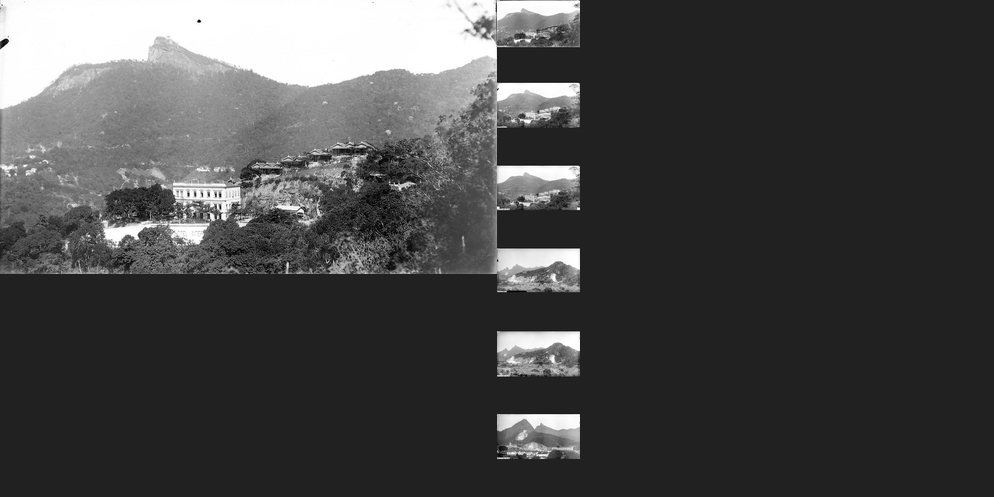

In [26]:
duplicates = duplicates_all
identifier = "0072137cx012-09"
by_order = 19

index = by_identifier(identifier) if by_identifier(identifier) else by_order
print("image:", " OR ".join(duplicates[index][1]))
compose(show(duplicates[index][2][0], thumb=900, idx=True),show(df["filename"].loc[duplicates[index][2][1:]],thumb=900, idx=True,notecol=df["id"].loc[duplicates[index][2][1:]]))
